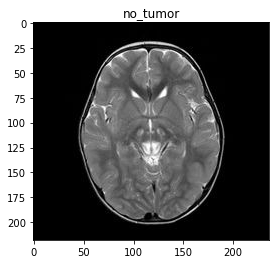

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor', 'pituitary_tumor','glioma_tumor','meningioma_tumor'}
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(cls)

X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

xtrain = xtrain/255
xtest = xtest/255

# from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# dec = {0:'No Tumor', 1:'Pituitary Tumor', 2:'Glioma tumor',3:'Meningioma tumor'}
# import warnings
# warnings.filterwarnings('ignore')

# lg = LogisticRegression(C=0.1)
# lg.fit(xtrain, ytrain)

sv = SVC()
sv.fit(xtrain, ytrain)


#input and test main.py
jpg='brain_tumor/Testing/no_tumor/image(2).jpg'

img = cv2.imread(jpg,0)
img1 = cv2.resize(img, (200,200))
img1 = img1.reshape(1,-1)/255
p = sv.predict(img1)
plt.title(p[0])
plt.imshow(img, cmap='gray')
plt.axis('off')

(-0.5, 487.5, 511.5, -0.5)

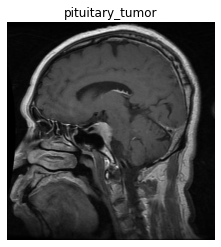

In [13]:
jpg='brain_tumor/Testing/pituitary_tumor/image(2).jpg'

img = cv2.imread(jpg,0)
img1 = cv2.resize(img, (200,200))
img1 = img1.reshape(1,-1)/255
p = sv.predict(img1)
plt.title(p[0])
plt.imshow(img, cmap='gray')
plt.axis('off')